# 乳癌資料庫預測SVM分類
>使用scikit-learn 機器學習套件裡的SVR演算法

* (一)引入函式庫及內建乳癌資料集<br>
引入之函式庫如下<br>
sklearn.datasets: 用來匯入內建之乳癌資料集`datasets.load_breast_cancer()`<br>
sklearn.SVR: 支持向量機回歸分析之演算法<br>
matplotlib.pyplot: 用來繪製影像

In [1]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step1. 下載資料
嘗試用眾多資料中取其中兩個(第3個特徵和第5個特徵)，畫切割圖<br>
第3個特徵:perimeter<br>
第5個特徵:smoothness (local variation in radius lengths)

In [2]:
breast_cancer=datasets.load_breast_cancer()

In [3]:
features = breast_cancer.data

In [4]:
target = breast_cancer.target

In [5]:
target_names = breast_cancer.target_names
labels = target_names[target]

In [6]:
malignant_1 = features[labels=='malignant',4]
malignant_2 = features[labels=='malignant',2]
malignant = np.c_[malignant_1,malignant_2]


benign_1 = features[labels=='benign',4] 
benign_2 = features[labels=='benign',2]
benign = np.c_[benign_1,benign_2]

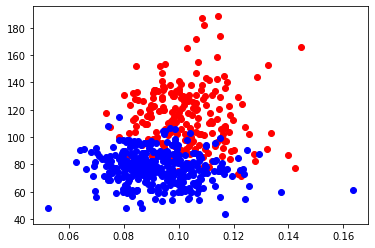

In [7]:
plt.scatter(malignant[:,0],malignant[:,1],color='red')
plt.scatter(benign[:,0],benign[:,1],color='blue')

In [8]:
training_data = np.r_[malignant,benign]
training_labels = np.r_[np.zeros(len(malignant)),np.ones(len(benign))]

In [9]:
clf=svm.SVC(kernel='linear',gamma='auto',C=100)
clf.fit(training_data,training_labels)

SVC(C=100, gamma='auto', kernel='linear')

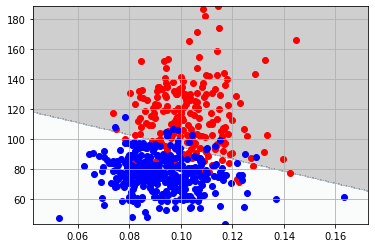

In [10]:
training_x_min=training_data[:,0].min()-0.01
training_x_max=training_data[:,0].max()+0.01
training_y_min=training_data[:,1].min()-0.01
training_y_max=training_data[:,1].max()+0.01
grid_interval=0.001
xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))

Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)
plt.autoscale()
plt.grid()
plt.scatter(malignant[:,0],malignant[:,1],color='red')
plt.scatter(benign[:,0],benign[:,1],color='blue')
plt.show()

In [11]:
breast_cancer=datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

## Step2. 區分訓練集與測試集

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Step3. 建模

In [13]:
clf=svm.SVC(kernel='linear',gamma='auto',C=100)
clf.fit(X_train,y_train)

SVC(C=100, gamma='auto', kernel='linear')

## Step4. 預測

```

```


In [14]:
clf.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

## Step5. 準確度分析

In [15]:
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

0.9648351648351648
0.956140350877193
